In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

vgts = pd.read_csv('vgsales.csv')

In [2]:
vgts.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [3]:
vgts.tail()

Rank                                              Name Platform  \
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year     Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
16593  2002.0  Platform       Kemco      0.01      0.00       0.0   
16594  2003.0   Shooter  Infogrames      0.01      0.00       0.0   
16595  2008.0    Racing  Activision      0.00      0.00       0.0   
16596  2010.0    Puzzle    7G//AMES      0.00      0.01       0.0   
16597  2003.0  Platform     Wanadoo      0.01      0.00       0.0   

       Other_Sales  Global_Sales  
16593          0.0          0.01  
16594          0.0          0.01  
16595          0.0          0.01  
16596          0.0          0.01  
16597          0.0          0.01

In [4]:
#Something doesn't look right about the last few entries and their sales.

import plotly.express as px

fig = px.line(vgts, x = 'Year', y = 'NA_Sales', title='North American Sales Over Time')
fig.show()

In [5]:
fig = px.line(vgts, x = 'Rank', y = 'NA_Sales', title='Sales by Rank')
fig.show()

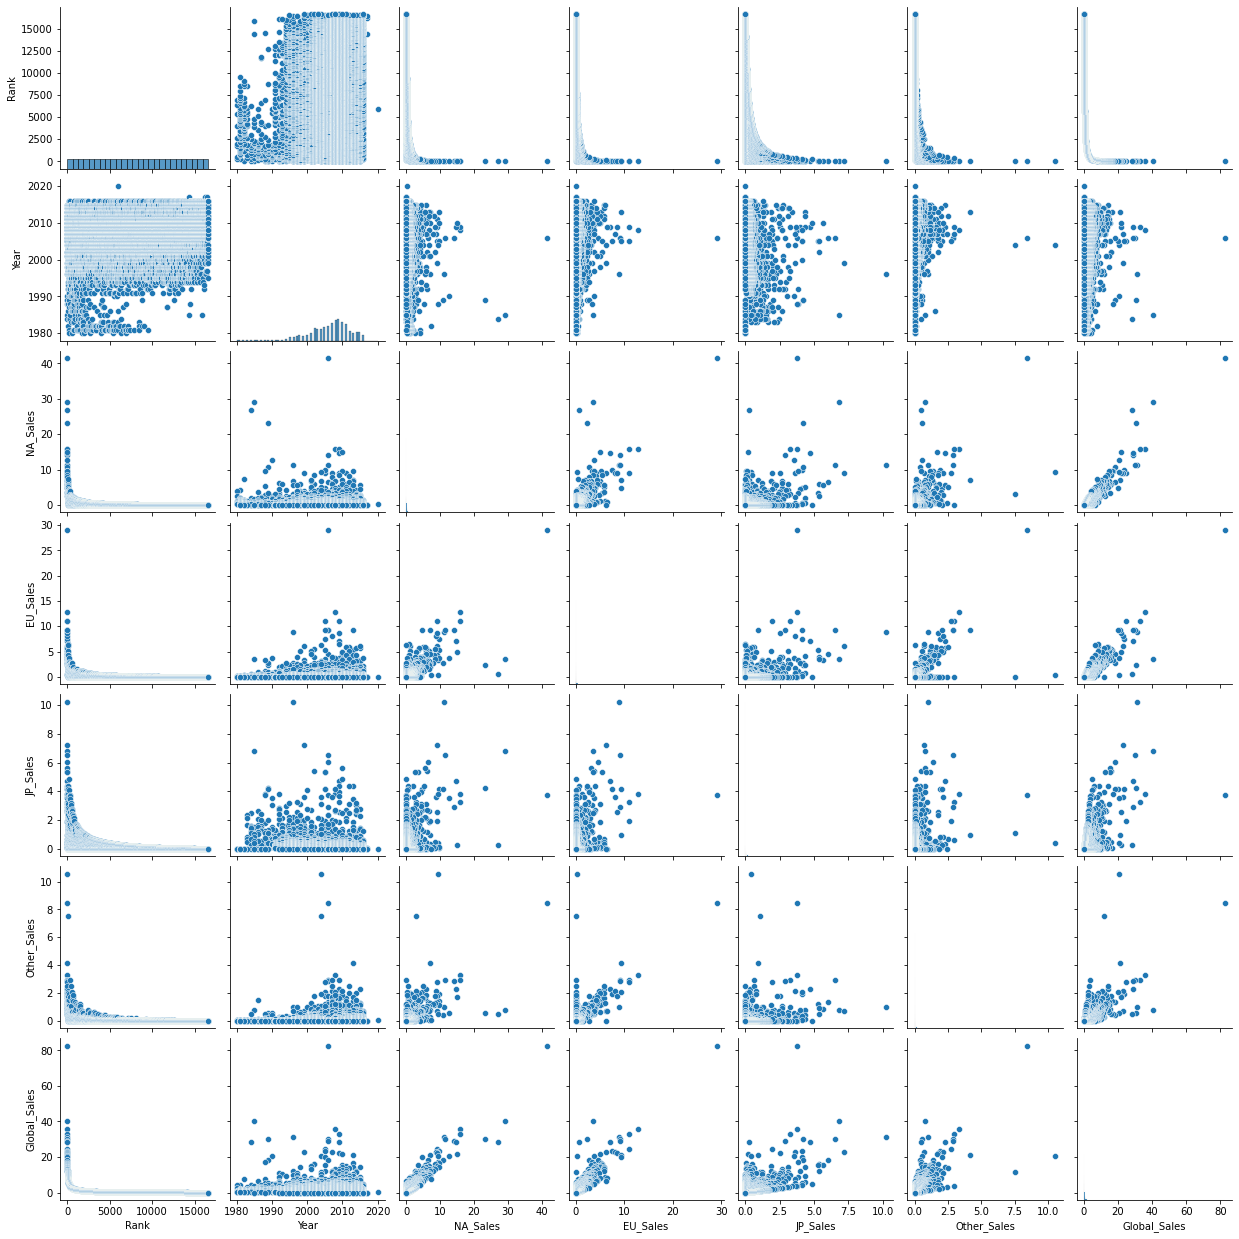

In [6]:
sns.pairplot(vgts)

# This feels incomplete... Trying to figure out how to work around this. 

In [7]:
vgts.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [8]:
vgts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
vgts.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
vgts.isna()

Rank   Name  Platform   Year  Genre  Publisher  NA_Sales  EU_Sales  \
0      False  False     False  False  False      False     False     False   
1      False  False     False  False  False      False     False     False   
2      False  False     False  False  False      False     False     False   
3      False  False     False  False  False      False     False     False   
4      False  False     False  False  False      False     False     False   
...      ...    ...       ...    ...    ...        ...       ...       ...   
16593  False  False     False  False  False      False     False     False   
16594  False  False     False  False  False      False     False     False   
16595  False  False     False  False  False      False     False     False   
16596  False  False     False  False  False      False     False     False   
16597  False  False     False  False  False      False     False     False   

       JP_Sales  Other_Sales  Global_Sales  
0         False        False         False  
1         False        False         False  
2         False        False         False  
3         False        False         False  
4         False        False         False  
...         ...          ...           ...  
16593     False        False         False  
16594     False        False         False  
16595     False        False         False  
16596     False        False         False  
16597     False        False         False  

[16598 rows x 11 columns]

# Cleaning...

In [11]:
vgts_clean = vgts.dropna()

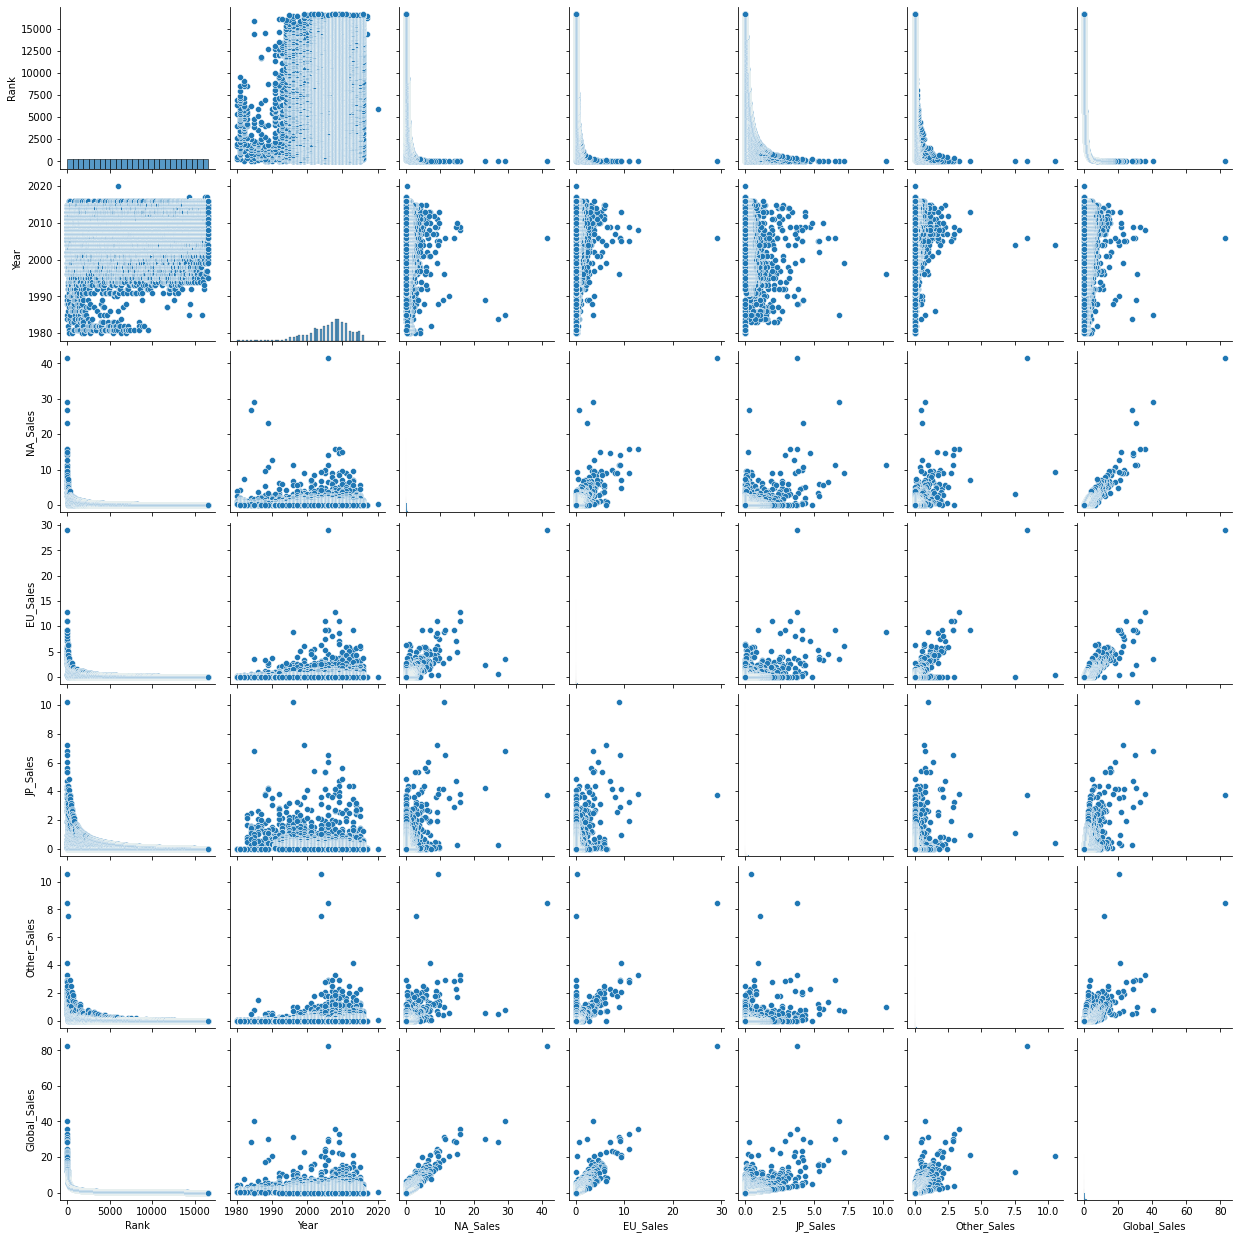

In [12]:
sns.pairplot(vgts_clean)

# Did not seem to make a difference. My biggest concern is the 0 sales. So I could drop the sales columns, and have the original dataset with... Just the rows that have actual sales included? Hmm. 

In [13]:
vgts2 = vgts_clean.loc[(vgts_clean!=0).any(axis=1)]
vgts2

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16291 rows x 11 columns]

# In a previous version of this notebook, I was floored about the 0 entries. The sales are in the millions, and some of these do not show very well. So keeping the 0 entries is important. 

<AxesSubplot:>

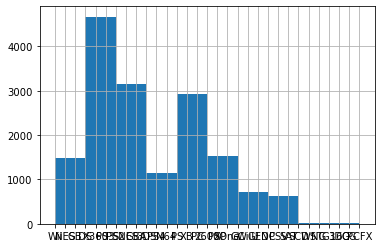

In [16]:
vgts2['Platform'].hist(bins=10)

<AxesSubplot:>

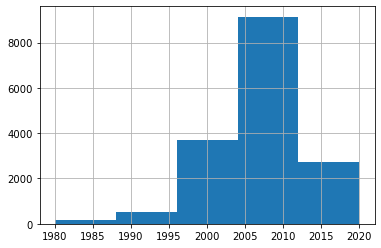

In [17]:
vgts2['Year'].hist(bins=5)

<AxesSubplot:>

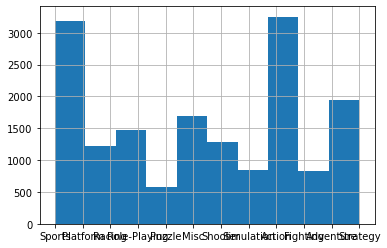

In [19]:
vgts2['Genre'].hist(bins=10)

<function matplotlib.pyplot.show(close=None, block=None)>

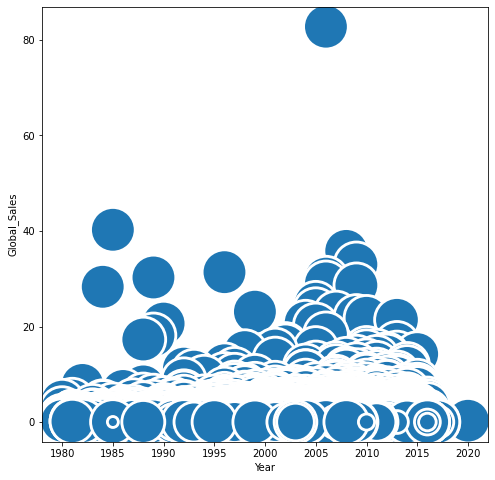

In [24]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.scatterplot(data=vgts2, x="Year", y="Global_Sales", size="Publisher", legend=False, sizes=(20, 2000))

plt.show

# The above bubble chart gives me an idea. I don't want to keep it because of overplotting, but I do want to try to make it prettier and show off the differences better.